# 0. Khai báo các thư viện cần dùng

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder

# 1. Đọc dữ liệu

In [2]:
df = pd.read_csv("https://s3.ap-southeast-1.amazonaws.com/learn.codegym.vn/media/public/2022/01/26023345/Credit_Scoring.csv", encoding = "ISO-8859-1")
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
1,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0
2,11,0,0.644226,30,0,0.309476,2500.0,5,0,0,0,0.0
3,12,0,0.018798,51,0,0.531529,6501.0,7,0,2,0,2.0
4,13,0,0.010352,46,0,0.298354,12454.0,13,0,2,0,2.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149992 entries, 0 to 149991
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            149992 non-null  int64  
 1   SeriousDlqin2yrs                      149992 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  149992 non-null  float64
 3   age                                   149992 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  149992 non-null  int64  
 5   DebtRatio                             149992 non-null  float64
 6   MonthlyIncome                         120262 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       149992 non-null  int64  
 8   NumberOfTimes90DaysLate               149992 non-null  int64  
 9   NumberRealEstateLoansOrLines          149992 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  149992 non-null  int64  
 11  

In [4]:
df.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,149992.000000,149992.000000,149992.000000,149992.000000,149992.000000,149992.000000,1.202620e+05,149992.000000,149992.000000,149992.000000,149992.000000,146068.000000
mean,75004.500000,0.066837,6.048729,52.295516,0.421029,352.985824,6.669872e+03,8.452877,0.265981,1.018221,0.240399,0.757236
std,43299.105125,0.249740,249.762028,14.771902,4.192890,2037.824499,1.438414e+04,5.146006,4.169414,1.129704,4.155290,1.115103
min,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37506.750000,0.000000,0.029863,41.000000,0.000000,0.175075,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75004.500000,0.000000,0.154162,52.000000,0.000000,0.366516,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112502.250000,0.000000,0.559012,63.000000,0.000000,0.868292,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


# 2. Kiểm tra dữ liệu khuyết thiếu và thay thế dữ liệu bị khuyết

In [5]:
df.isna()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,False,False,False,False,False,False,True,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
149987,False,False,False,False,False,False,False,False,False,False,False,False
149988,False,False,False,False,False,False,False,False,False,False,False,False
149989,False,False,False,False,False,False,True,False,False,False,False,False
149990,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
# Thay thế giá trị khuyết thiếu bằng giá trị nội suy theo các cột
df1 = df.interpolate(method = "linear", axis = 0).ffill().bfill()

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149992 entries, 0 to 149991
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            149992 non-null  int64  
 1   SeriousDlqin2yrs                      149992 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  149992 non-null  float64
 3   age                                   149992 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  149992 non-null  int64  
 5   DebtRatio                             149992 non-null  float64
 6   MonthlyIncome                         149992 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       149992 non-null  int64  
 8   NumberOfTimes90DaysLate               149992 non-null  int64  
 9   NumberRealEstateLoansOrLines          149992 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  149992 non-null  int64  
 11  

In [8]:
# Thay thế giá trị khuyết thiếu bằng giá trị 0
df2 = df.fillna(0)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149992 entries, 0 to 149991
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            149992 non-null  int64  
 1   SeriousDlqin2yrs                      149992 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  149992 non-null  float64
 3   age                                   149992 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  149992 non-null  int64  
 5   DebtRatio                             149992 non-null  float64
 6   MonthlyIncome                         149992 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       149992 non-null  int64  
 8   NumberOfTimes90DaysLate               149992 non-null  int64  
 9   NumberRealEstateLoansOrLines          149992 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  149992 non-null  int64  
 11  

# 3. Vẽ biểu đồ boxplot, biểu đồ phân bố dữ liệu cho các cột

<AxesSubplot:xlabel='MonthlyIncome'>

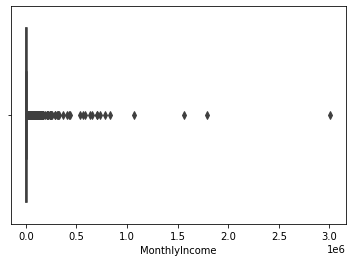

In [9]:
# Vẽ boxplot cho dữ liệu ở cột MonthlyIncome
sns.boxplot(x = df1.MonthlyIncome)

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

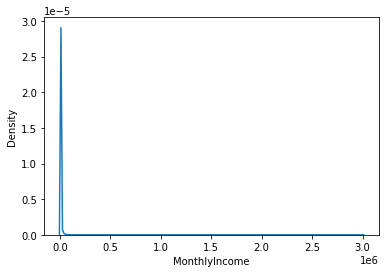

In [10]:
# vẽ biểu đồ phân bố dữ liệu
sns.kdeplot(data = df1.MonthlyIncome)

# 4. Xử lý dữ liệu ngoại lai

In [11]:
# Xoá dữ liệu ngoại lai bằng IQR Score
Q1 = df1.MonthlyIncome.quantile(0.25)
Q3 = df1.MonthlyIncome.quantile(0.75)
IQR = Q3 - Q1

In [12]:
# Xác định phần tử không phải ngoại lai
new_df = df1[~((df1.MonthlyIncome < (Q1 - 1.5*IQR)) | (df1.MonthlyIncome > (Q3 + 1.5*IQR)))]

In [13]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143961 entries, 2 to 149991
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            143961 non-null  int64  
 1   SeriousDlqin2yrs                      143961 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  143961 non-null  float64
 3   age                                   143961 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  143961 non-null  int64  
 5   DebtRatio                             143961 non-null  float64
 6   MonthlyIncome                         143961 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       143961 non-null  int64  
 8   NumberOfTimes90DaysLate               143961 non-null  int64  
 9   NumberRealEstateLoansOrLines          143961 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  143961 non-null  int64  
 11  

<AxesSubplot:xlabel='MonthlyIncome'>

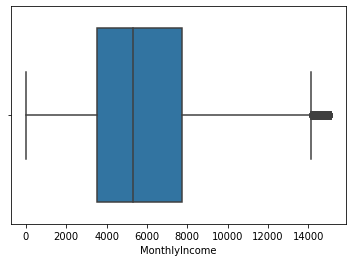

In [14]:
# Vẽ biểu đồ boxplot cho cột MonthlyIncome
sns.boxplot(x = new_df.MonthlyIncome)

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

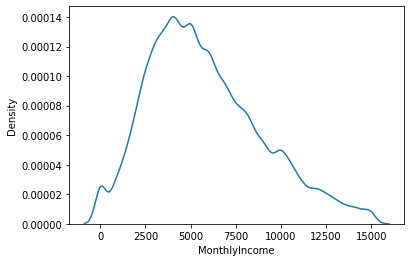

In [15]:
# Vẽ biểu đồ phân bố dữ liệu
sns.kdeplot(data = new_df.MonthlyIncome)

# 5. Mã hoá dữ liệu

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149992 entries, 0 to 149991
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            149992 non-null  int64  
 1   SeriousDlqin2yrs                      149992 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  149992 non-null  float64
 3   age                                   149992 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  149992 non-null  int64  
 5   DebtRatio                             149992 non-null  float64
 6   MonthlyIncome                         149992 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       149992 non-null  int64  
 8   NumberOfTimes90DaysLate               149992 non-null  int64  
 9   NumberRealEstateLoansOrLines          149992 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  149992 non-null  int64  
 11  

=> Đã thử mã hoá dữ liệu nhưng hiện chưa thể mã hoá dữ liệu dạng số

# 6. Chia dữ liệu ở các cột thành nhóm có số lượng phần tử bằng nhau và đếm số lượng phần tử ở mỗi nhóm, lấy ra khoảng dữ liệu của mỗi nhóm

In [17]:
# Rời rạc hoá dữ liệu "DebtRatio" thành 5 nhóm có số lượng phần tử tương đương nhau, sử dụng pd.qcut()
cats = pd.qcut(df1.DebtRatio, 5)

In [18]:
cats

0         (4.0, 329664.0]
1            (0.468, 4.0]
2          (0.287, 0.468]
3            (0.468, 4.0]
4          (0.287, 0.468]
               ...       
149987     (0.134, 0.287]
149988       (0.468, 4.0]
149989    (4.0, 329664.0]
149990    (-0.001, 0.134]
149991     (0.134, 0.287]
Name: DebtRatio, Length: 149992, dtype: category
Categories (5, interval[float64, right]): [(-0.001, 0.134] < (0.134, 0.287] < (0.287, 0.468] < (0.468, 4.0] < (4.0, 329664.0]]

In [19]:
# Số lượng phần tử ở mỗi phần
pd.value_counts(cats)

(0.468, 4.0]       30107
(-0.001, 0.134]    29999
(0.134, 0.287]     29998
(0.287, 0.468]     29998
(4.0, 329664.0]    29890
Name: DebtRatio, dtype: int64

# 7. Chia dữ liệu ở các cột age và MonthlyIncome thành 5 nhóm theo các khoảng: 0, 30, 40, 50, 80, 150 và đếm số lượng phần tử ở mỗi nhóm

In [20]:
df1.age.unique()

array([ 27,  57,  30,  51,  46,  40,  76,  64,  78,  53,  43,  25,  38,
        39,  32,  58,  50,  69,  24,  28,  62,  42,  75,  26,  52,  41,
        81,  31,  68,  70,  73,  29,  55,  35,  72,  60,  67,  36,  56,
        49,  37,  66,  45,  83,  34,  44,  48,  61,  80,  47,  74,  59,
        77,  63,  54,  33,  79,  65,  86,  92,  23,  87,  71,  22,  90,
        97,  84,  82,  91,  89,  85,  88,  21,  93,  96,  99,  94,  95,
       101,  98, 103, 102, 107, 105,   0, 109], dtype=int64)

In [23]:
bins = [0, 30, 40, 50, 80, 150]
group_names = ["U30", "U40", "U50", "U80", "Long-live"]

age_range = pd.cut(df1.age, bins, labels = group_names)
age_range

0         U30
1         U80
2         U30
3         U80
4         U50
         ... 
149987    U80
149988    U50
149989    U80
149990    U30
149991    U80
Name: age, Length: 149992, dtype: category
Categories (5, object): ['U30' < 'U40' < 'U50' < 'U80' < 'Long-live']

In [24]:
pd.value_counts(age_range)

U80          74928
U50          35035
U40          24336
U30          10756
Long-live     4936
Name: age, dtype: int64